Social Data Science WS20/21

# Home Assignment 1



### General Instructions

Submit your solution via Moodle until 23.59pm on Tuesday, November 24th. Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of up 3-4 members.
Please denote all members of the team with their student ID and full name in the notebook. Please submit only one notebook per team. Only submit a notebook, do not submit the dataset(s) you used or image files that you have created - these have to be created from your notebook. Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.


### Evaluation and Grading

Evaluation of your submission is done semi-automatically. Think of it as this notebook being 
executed once. Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only
* Make sure to restrict yourself to using packages that are automatically installed along with anaconda, as other imports might not work on our machines. For the visualization tasks, you may additionally use ```seaborn```, ```plotly```, ```altair```, and ```bokeh```. An overview of packages that can be used can be found in the file 'environment.yaml'.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature and header of a function is usually specified in the task description and via code skeletons.
* Again, make sure that all your function as well as variable names match with what we have specified! The automated grading will only match these exact names, and everything that is not matching will not be graded.
* This also holds for the plots you have to save and create - always use the name that is specified! 
* Whenever there is a written task, e.g. task 1d), enter your answer in the specified markdown cell. Do NOT remove the label (e.g. '**A1d):**' ) from the markdown cell, as this will have to be parsed by the grading system and matched to your answer. 
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename the dataset you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your   working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `pd.read_csv("qog_file.csv")` instead of `pd.read_csv("C:/User/Path/to/your/Homework/qog_file.csv")` so that the code directly works from our machines.
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points.
* You may create as many additional cells as you want, just make sure that your code is properly running through.
* Ensure your code / notebook terminates in reasonable time.


**There's a story behind each of these points! Don't expect us to fix your stuff!**

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members (you may add or remove items from the dictionary, but keep this dictionary structure)
team_members = [
    {
        'first_name': 'Na Young',
        'last_name': 'Ahn',
        'student_id': 392326
    },
    {
        'first_name': 'Esther',
        'last_name': 'Tala',
        'student_id': 368095
    },
    {
        'first_name': 'Mika',
        'last_name': 'Rosin',
        'student_id': 395049
    },
    {
        'first_name': 'Laurin',
        'last_name': 'Ellenbeck',
        'student_id': 372280
    }
]

## Exploring the Quality of Government Dataset

In this home assignment we are going to explore the 2020 Quality of Government dataset(s) that has been assembled by the QOG institute from University of Gothenburg.
All data as well as documentation can be found here: https://www.qogdata.pol.gu.se/data/

Note that we only consider the data that has been published in January 2020, i.e. the data files that contain the suffix "jan20". Do NOT use any other dataset other than those that can be found in this online repo, except for the data file that we refer to in task 1.

#### Plotting guidelines:
* For both visualization tasks, you may only create ONE graphic. Thus, if you want to convey much information, think properly about how you can approach this. If you create an image full of subfigures, we will only count the LAST one.
* To get full marks for your plots, we require that you consider the principles taught in lecture. In particular, your plot and the message they convey should be easy to understand. No chart-junk. Optimize the data to ink ratio. Make your plot informative!
* Write a brief summary (<=5 sentences) of your plot into the specified markdown cell. 
* Make sure you also pay attention to details such as properly calibrated axes, understandable labels, properly placed legends, etc.
* A baseline to obtain 50% of the points per task is given in the task description.

In [10]:
# a list of packages that can be used to solve this assignment
# you may load additional packages (cf instructions above)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Task 1: Analyzing Life Expectancy  (50 pts)

It is widely known that in most countries in Africa, the life expectancy is much lower than in well-developed countries such as Germany. In this first part of the homework, we are looking into this issue.

We are going to investigate differences with respect to continents, and we consider five continents: Africa, Americas, Asia, Europe, Oceania. We use the following reference allocation from countries to continents:  
https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

Note that loading this file into your notebook will also yield the easiest way to add continent information to the QOG data. Again, keep the existing file name "all.csv".

#### a) Collecting Life Expectancies (10 pts)

Collect the life expectancies (column "wdi_lifexp") of all European and all African countries, and store them in two distinct one-dimensional numpy arrays. More precisely, store the life expectancies of the European countries in a variable called ```le_eu```, and the life expectancies of the African countries in a variable called ```le_af```. Remove all NaN-values from the data!  
__Note:__ Make sure to not alter these arrays in later subtasks, as otherwise this will result in errors in the automated grading!

In [9]:
##Nayoung

# qog has basic, standard, oecd data in cross sectional(cs) or timeseries(ts)
# we do not use oecd data since it only has 36 countries excluding many african nations
# we only use jan20 data

df_qog_bas = pd.read_csv("qog_bas_cs_jan20.csv", na_values="NaN")
df_reg = pd.read_csv("all.csv")

df1 = df_qog_bas[['cname', 'wdi_lifexp']]

df2 = df_reg[['name', 'region']]
df2.rename(columns={'name':'cname'}, inplace=True)

df_lifexp = pd.merge(df1, df2, how='left', on='cname')

le_af = df_lifexp[df_lifexp['region'] == 'Africa'].wdi_lifexp.dropna().to_numpy(dtype=float)
le_eu = df_lifexp[df_lifexp['region'] == 'Europe'].wdi_lifexp.dropna().to_numpy(dtype=float)

#### b) The Test Statistic (5 pts)

We would like to test whether the life expectancy in Africa is significantly lower than in Europe. Choose an appropriate test statistic based on the average life expectancies per country, and implement a function ```my_statistic``` that computes this corresponding statistic. Use the function signature specified in the cell below.

In [4]:
##Nayoung

# INPUT VALUES:
# v1: numpy array representing life expectancies in Europe (could also be any other data array)
# v2: numpy array representing life expectancies in Africa (could also be any other data array)
#
# RETURN:
# resulting value of test statistic, as float

def my_statistic(v1, v2):
    # your code here
    mean_diff = np.mean(v1) - np.mean(v2)
    return mean_diff


In [5]:
my_statistic(le_eu, le_af)

16.17166769613248

#### c) Automating Simulation (10 pts)

We want to apply the results from a) and b) to conduct a statistical test on the hypothesis that life expectancy in African countries is significantly lower than in European countries. For that purpose, write a function ```my_test``` that performs this test by means of a randomized simulation. In that simulation, we randomize the life expectancies between the continents ```num_sim``` times, each time computing the test statistic specified by ```stat_func```, to calculate the corresponding p-value. Use the function stub specified in the cell below. Note that the resulting function can also generalize to other test scenarios.

In [6]:
##Esther, Laurin

choice_divider = 30

def my_test(v1, v2, stat_func, num_sim):
    count = 0
    # Calculate how many elements to take each run.
    # Determined by the smallest set and ensure that atleast 1 element is taken.
    choice_size = max(int(min(len(v1), min(v2) / choice_divider)), 1)
    for i in range(num_sim):
        r1 = np.random.choice(v1, size=choice_size, replace=False)
        r2 = np.random.choice(v2, size=choice_size, replace=False)        
        
        if stat_func(r1, r2) < 0:
            count += 1
    return count/num_sim

#### d) Running the Test (5 pts)

Apply the function from c) to conduct a statistical test on the hypothesis that life expectancy in African countries is significantly lower than in European countries, using 10,000 randomizations. 
Save the resulting p-value into a variable called ```p_val``` and interpret its value.
Is there indeed a statistically significant difference in life expectancies between Europe and Africa? Write your answer into the cell __A1d)__ .

In [7]:
p_val = my_test(le_eu, le_af, my_statistic, 10000)
print(p_val)

0.018


**A1d):** 

Yes, there is indeed a statistically significant difference in life expectancies between Europe and Africa as we can deduct from the p-value. We start with the null hypothesis is that life expectancy in Africa is not lower than in Europe. Because the p-value is < 0.05 the life expectancy in African countries is significantly lower than that of European countries. In other words, we can deduce that > 95 percent of the time, European countries show higher life expectancy than that of African countries. 


#### e) Visualization  (20 pt):
We now consider the life expectancies over all continents. Create an informative visualization that points out how the life expectancies over all five continents differ. Save this visualization into a file called *life_expectancy_plot.png*, and provide a proper description of your plot, including takeaways from your visualization, in cell **D1e)**!

50% baseline: Plotting life expectancy means by continent against each other in a clean plot.

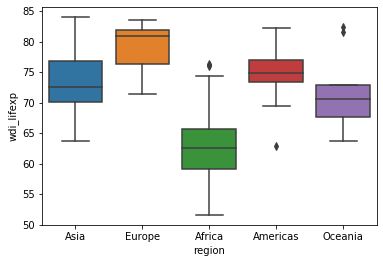

In [11]:
sns.boxplot(x="region", y="wdi_lifexp", hue="region", data=df_lifexp, dodge=False)

plt.savefig('life_expectancy_plot.png')
plt.legend
plt.legend([],[], frameon=False)

**D1e):** 

Comparing stats only with their respective average can be misleading as mean values are very suceptible to any extreme outlier. Hence, we chose a boxplot that shows not only the median (Q2), first and third quartile (Q1, Q3) represented by the box and minimum(Q1 - 1.5*IQR(Interquartile Range) and maximum(Q3 + 1.5*IQR) represented by the whiskers and lastly outliers in points. In such manner we get a holistic understanding of the distribution of the life expectancy in different countinents. Each regions are represented in different colors as shown in the legend and the verticle, horizontal axes respectivly represent life expectation and different continents.

### Task 2: Investigating Corruption (50 pts)

In this second part, we focus on corruption as measured by the _Political Corruption Index_ (Column vdem_corr). 
Explore the data for factors that correlate with corruption, and visualize your findings.  Save this visualization into a file called *corruption_plot.png*, and provide a proper description of your plot, including takeaways from your visualization, in cell **D2**!  
__Note__: you may NOT consider correlations with other columns that explicitly measure some form of corruption.

50% Baseline: Plotting values from one other column in the data against the Political Corruption Index in a properly designed plot, where some correlation becomes apparent.

Column: wbgi_cce, Value: -0.9082863406986007
Column: ti_cpi, Value: -0.8943329614676325
Column: icrg_qog, Value: -0.8588773500244776
Column: wbgi_rle, Value: -0.8566574008051191


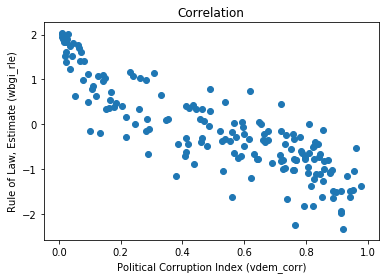

In [12]:
from pandas.api.types import is_numeric_dtype
import math

#df_vdem_corr = df_qog_bas.corrwith(df_qog_bas.vdem_corr, axis=0, drop=False, method='pearson')
#df_vdem_corr.dropna().abs().sort_values(ascending = False)

df_vdem_corr = df_qog_bas[df_qog_bas["vdem_corr"].notna()]

correlation_threshold = 0.85

# Columns to check
columns = list(df_vdem_corr)
columns.remove("vdem_corr")

correlations = {}

for column in columns:    
    # Drop rows that are unusable
    df_column = df_vdem_corr[df_vdem_corr[column].notna()]    
    
    # Only check numeric
    if is_numeric_dtype(df_vdem_corr[column]):
        correlation = df_column[column].corr(df_column["vdem_corr"], method="pearson")
        if not math.isnan(float(correlation)) and abs(correlation) > correlation_threshold:
            correlations[column] = correlation

correlations = sorted(correlations.items(), key = lambda item: abs(item[1]), reverse=True)
            
for (key, value) in correlations:
    print(f"Column: {key}, Value: {value}")

#print()    
#print(f"Selecting: {correlations[0][0]} with value {correlations[0][1]}")
        
corr_index = "wbgi_rle"
data_without_corr = pd.notnull((df_vdem_corr[corr_index]))
plot_data = df_vdem_corr[data_without_corr]

plt.scatter(plot_data['vdem_corr'], plot_data[corr_index])
plt.xlabel("Political Corruption Index (vdem_corr)")
plt.ylabel("Rule of Law, Estimate (wbgi_rle)")
plt.title("Correlation")

# Save first because of jupyter
plt.savefig("corruption_plot.png")
plt.show()

**D2:** 
The dots each represent a country. The x axis shows the corruption value and the y axis the Rule of Law, Estimate. A clear correlation between thoose values can be seen, as if the Rule of Law increases, the corruption sinks. Likewise the corruption rises the lower the Rule of Law is.

We omitted the wbgi_cce, ti_cpi, icrg_qog values, as they measure corruption.
